In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mixing_experiments2 import Experiment

In [2]:
import scienceplots
plt.style.use(['science', 'ieee', 'no-latex'])
plt.rcParams.update({'figure.dpi': '300'})


# plt.style.use(['default'])

In [46]:
En = np.geomspace(1e-5, 16, 500)[::-1]

ablator_thickness = np.array(50e-6)

experiment = Experiment(ablator_thickness, 250, n_runs = 300)
experiment.run_experiment()

run 1 of 300
time taken to solve ODEs: 1.2656679153442383
run 2 of 300
time taken to solve ODEs: 0.7124199867248535
run 3 of 300
time taken to solve ODEs: 0.6303448677062988
run 4 of 300
time taken to solve ODEs: 0.4884617328643799
run 5 of 300
time taken to solve ODEs: 0.47620391845703125
run 6 of 300
time taken to solve ODEs: 0.7628910541534424
run 7 of 300
time taken to solve ODEs: 0.4520070552825928
run 8 of 300
time taken to solve ODEs: 0.3581099510192871
run 9 of 300
time taken to solve ODEs: 0.5768601894378662
run 10 of 300
time taken to solve ODEs: 0.35888218879699707
run 11 of 300
time taken to solve ODEs: 0.27051520347595215
run 12 of 300
time taken to solve ODEs: 0.40071678161621094
run 13 of 300
time taken to solve ODEs: 0.34942626953125
run 14 of 300
time taken to solve ODEs: 0.36565089225769043
run 15 of 300
time taken to solve ODEs: 0.5263187885284424
run 16 of 300
time taken to solve ODEs: 0.267197847366333
run 17 of 300
time taken to solve ODEs: 0.4042377471923828
run 

In [47]:
x = (experiment.outer_hotspot + experiment.ablator_thickness) * 1e6

y_w = experiment.N_captures_w * 100 / experiment.total_neutrons
y_p = experiment.N_captures_p * 100 / experiment.total_neutrons

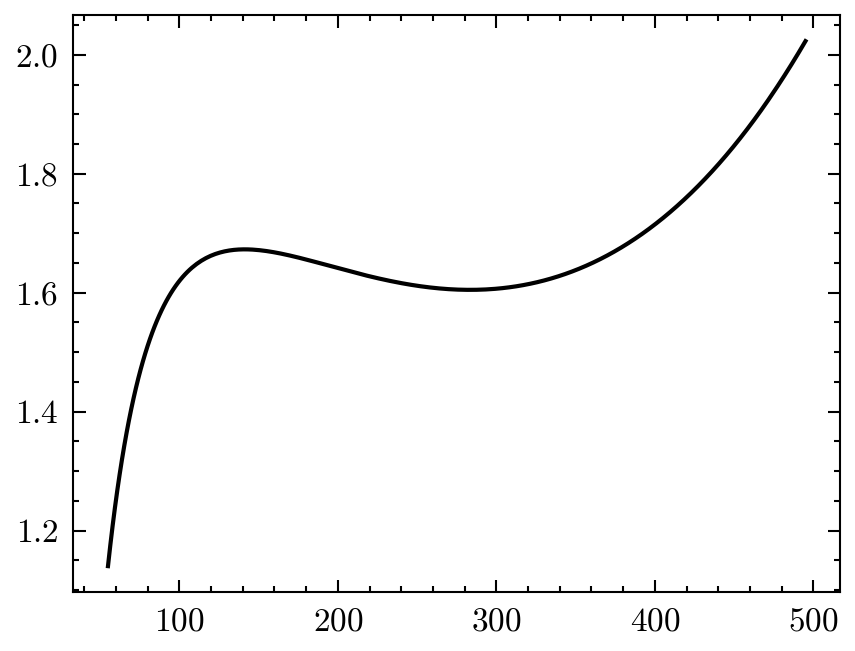

In [48]:
plt.plot(x, y_w/y_p)
plt.show()

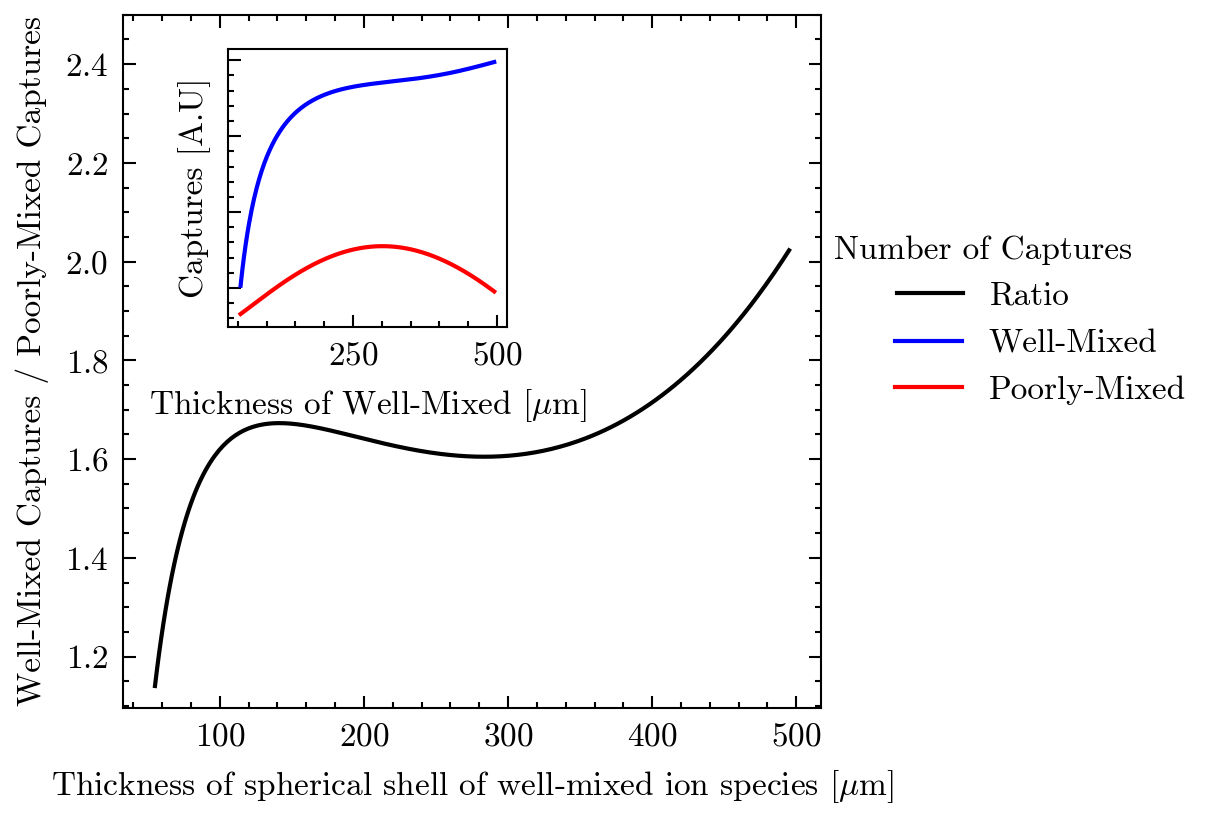

In [60]:
fig,ax = plt.subplots(figsize=(3,3))

ax.set_xlabel(r'Thickness of spherical shell of well-mixed ion species [$\mu$m]')
ax.set_ylabel('Well-Mixed Captures / Poorly-Mixed Captures')

ax.plot(x, y_w/y_p, label='Ratio')

# ax_ins = ax.inset_axes([0.45, 0.075, 0.5, 0.5])
# ax_ins = ax.inset_axes([0.65, 0.075, 0.3, 0.3])
ax_ins = ax.inset_axes([0.15, 0.55, 0.4, 0.4])
# ax_ins = ax.inset_axes([0.35, 0.5, 0.5, 0.5])
ax_ins.tick_params(axis = 'x', which = 'both', bottom = True, labelbottom = True, top = False, labeltop = False)
ax_ins.tick_params(axis = 'y', which = 'both', left = True, labelleft = False, right = False, labelright = False)

ax.set_ylim(top=2.5)

ax_ins.plot(x, y_w*1e8, '-', color='C2', label='Well-Mixed')
ax_ins.plot(x, y_p*1e8, '-', color='C1', label='Poorly-Mixed')
ax_ins.set_xlabel(r'Thickness of Well-Mixed [$\mu$m]')
ax_ins.set_ylabel('Captures [A.U]')
ax_ins.legend(loc=(2.345, -0.33))

fig.legend(bbox_to_anchor=(0.9, 0.65), loc=2, borderaxespad=0.,title='Number of Captures')

# plt.savefig('/Users/brynlloyd/Desktop/mixing_graph1.png', dpi=600)

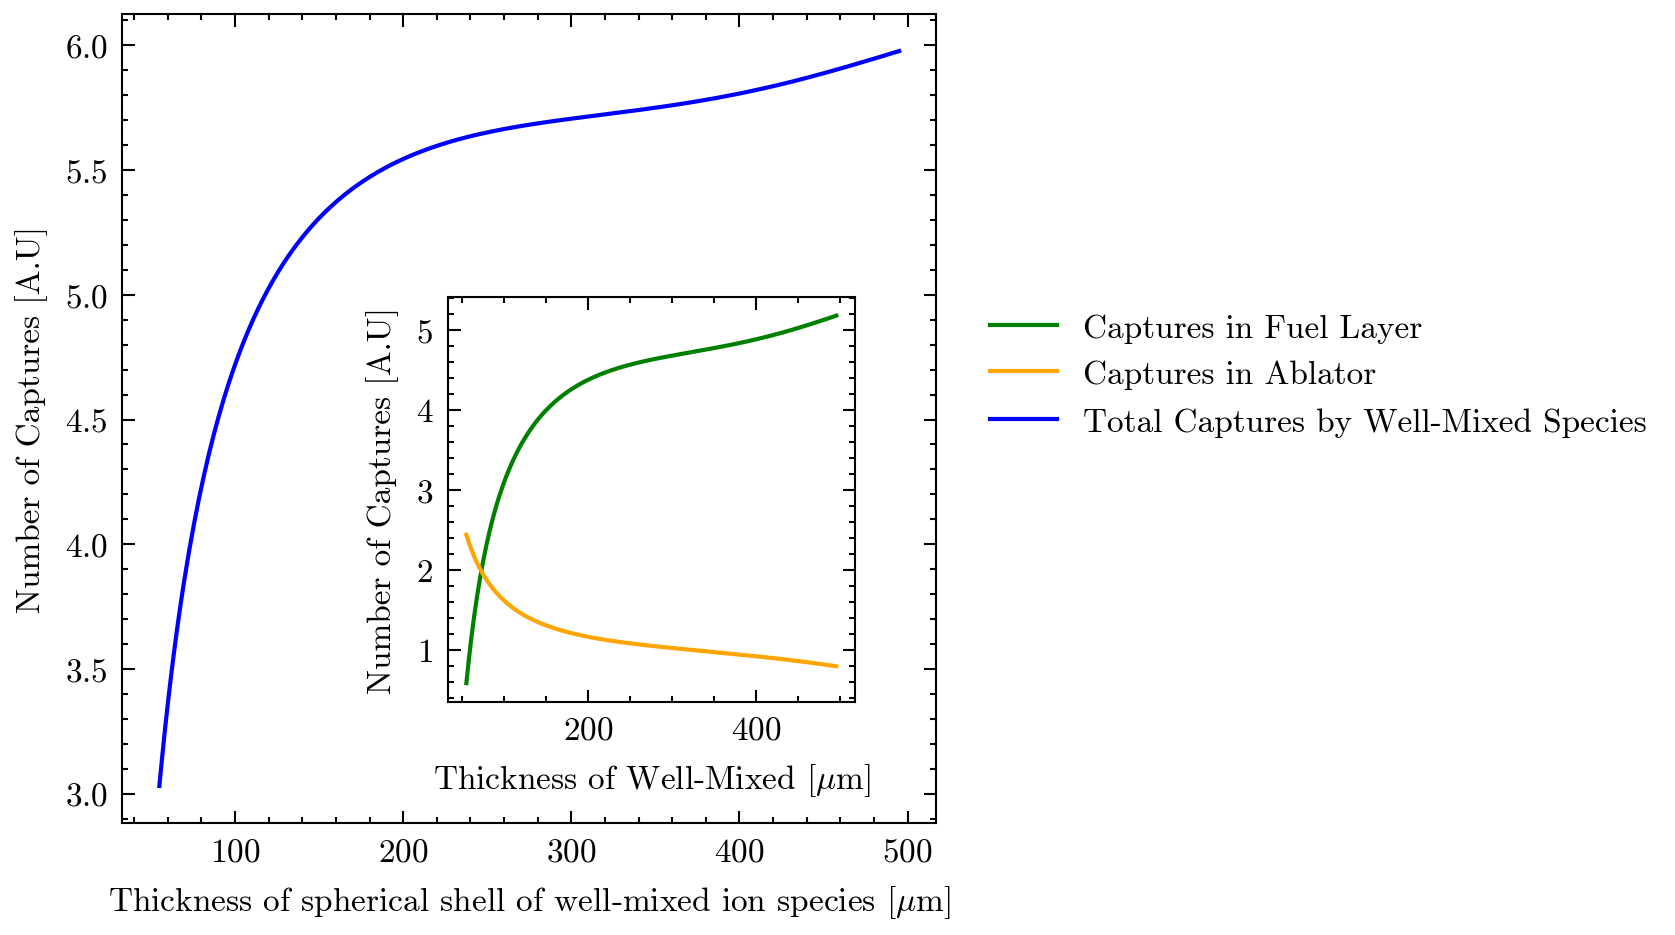

In [50]:
# decomopsing well-mixed captures into captures in outer hotspot and ablator

fig,ax = plt.subplots(figsize=(3.5,3.5))

y_w_outer = experiment.N_captures_w_outer * 100 / experiment.total_neutrons
y_w_ablator = experiment.N_captures_w_ablator * 100 / experiment.total_neutrons


ax.plot(x, y_w*1e8, '-', color='C2', label='Total Captures by Well-Mixed Species')
ax.set_ylabel('Number of Captures [A.U]')
ax.set_xlabel(r'Thickness of spherical shell of well-mixed ion species [$\mu$m]')



ax_ins = ax.inset_axes([0.4, 0.15, 0.5, 0.5])
ax_ins.set_xlabel(r'Thickness of Well-Mixed [$\mu$m]')
ax_ins.set_ylabel(r'Number of Captures [A.U]')



ax_ins.plot(x, y_w_outer*1e8, '-', color='green', label='Captures in Fuel Layer')
ax_ins.plot(x, y_w_ablator*1e8, '-', color='orange', label='Captures in Ablator')
ax_ins.legend(loc=(1.3, 0.74))
ax.legend(bbox_to_anchor=(1.05, 0.53), loc=2, borderaxespad=0.)

# plt.savefig('/Users/brynlloyd/Desktop/mixing_graph2.png', dpi=600)


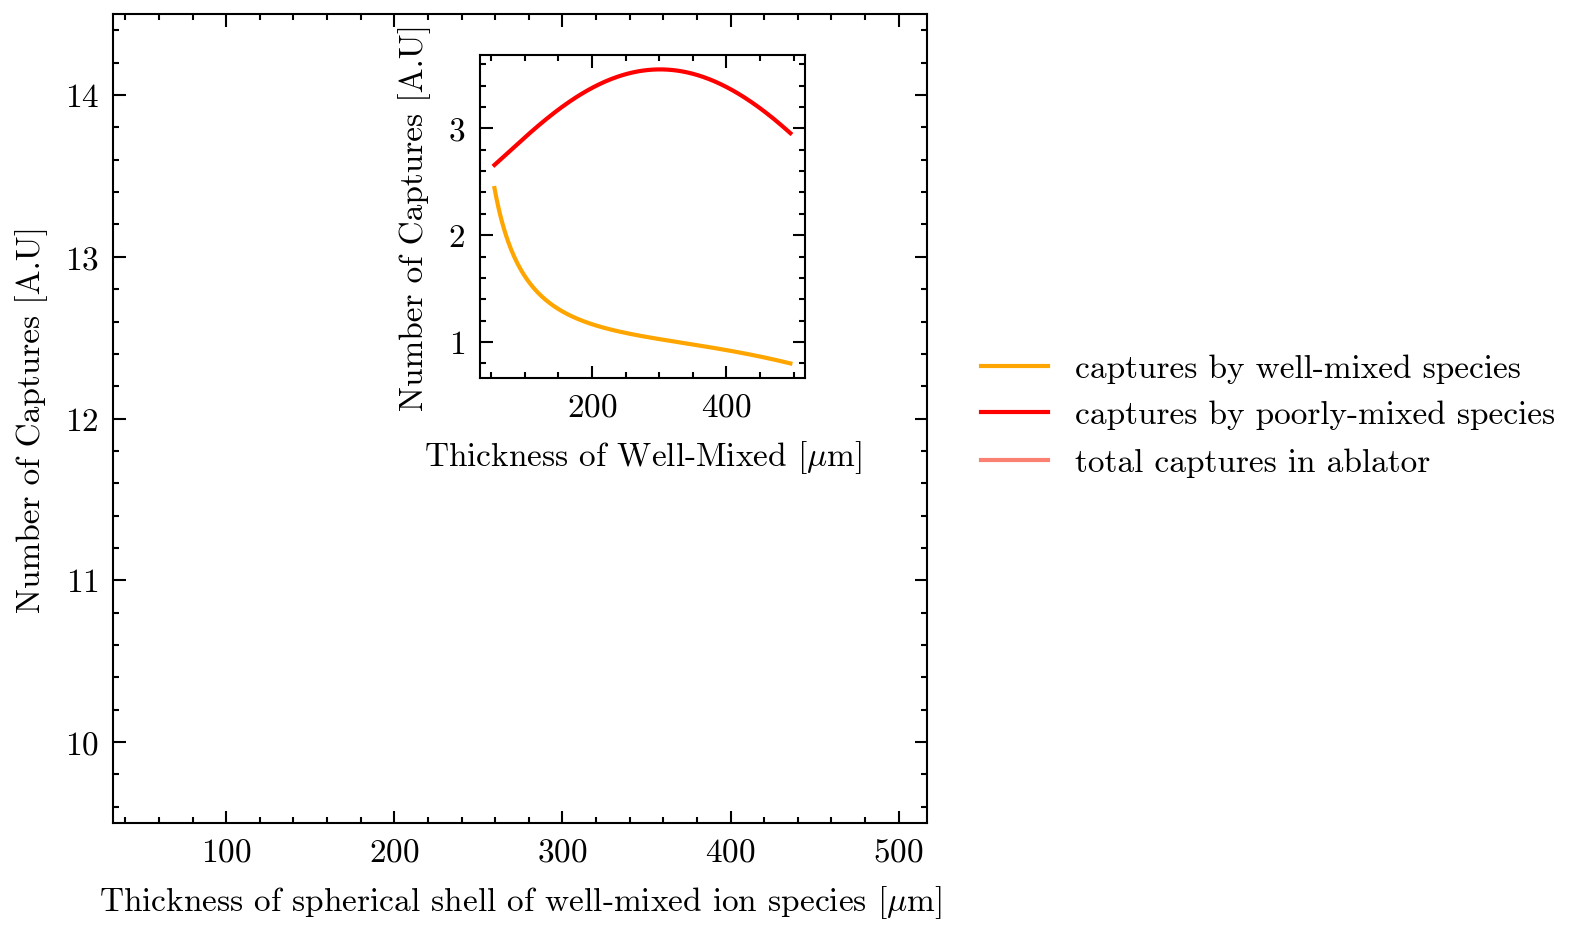

In [51]:
# captures that happen in ablator are from poorly-mixed and well-mixed

fig,ax = plt.subplots(figsize=(3.5,3.5))
ax.set_ylim((9.5,14.5))
ax.plot(x, (y_w_ablator + y_p)*1e8, color='salmon', label='total captures in ablator')
ax.set_ylabel('Number of Captures [A.U]')
ax.set_xlabel(r'Thickness of spherical shell of well-mixed ion species [$\mu$m]')

ax_ins = ax.inset_axes([0.45, 0.55, 0.4, 0.4])
ax_ins.set_xlabel(r'Thickness of Well-Mixed [$\mu$m]')
ax_ins.set_ylabel(r'Number of Captures [A.U]')
ax_ins.plot(x, y_w_ablator*1e8, '-', color='orange', label='captures by well-mixed species')
ax_ins.plot(x, y_p*1e8, '-', color='C1', label='captures by poorly-mixed species')
ax_ins.legend(loc=(1.50, -0.2))
ax.legend(bbox_to_anchor=(1.05, 0.48), loc=2, borderaxespad=0.)

# plt.savefig('/Users/brynlloyd/Desktop/mixing_graph3.png', dpi=600)

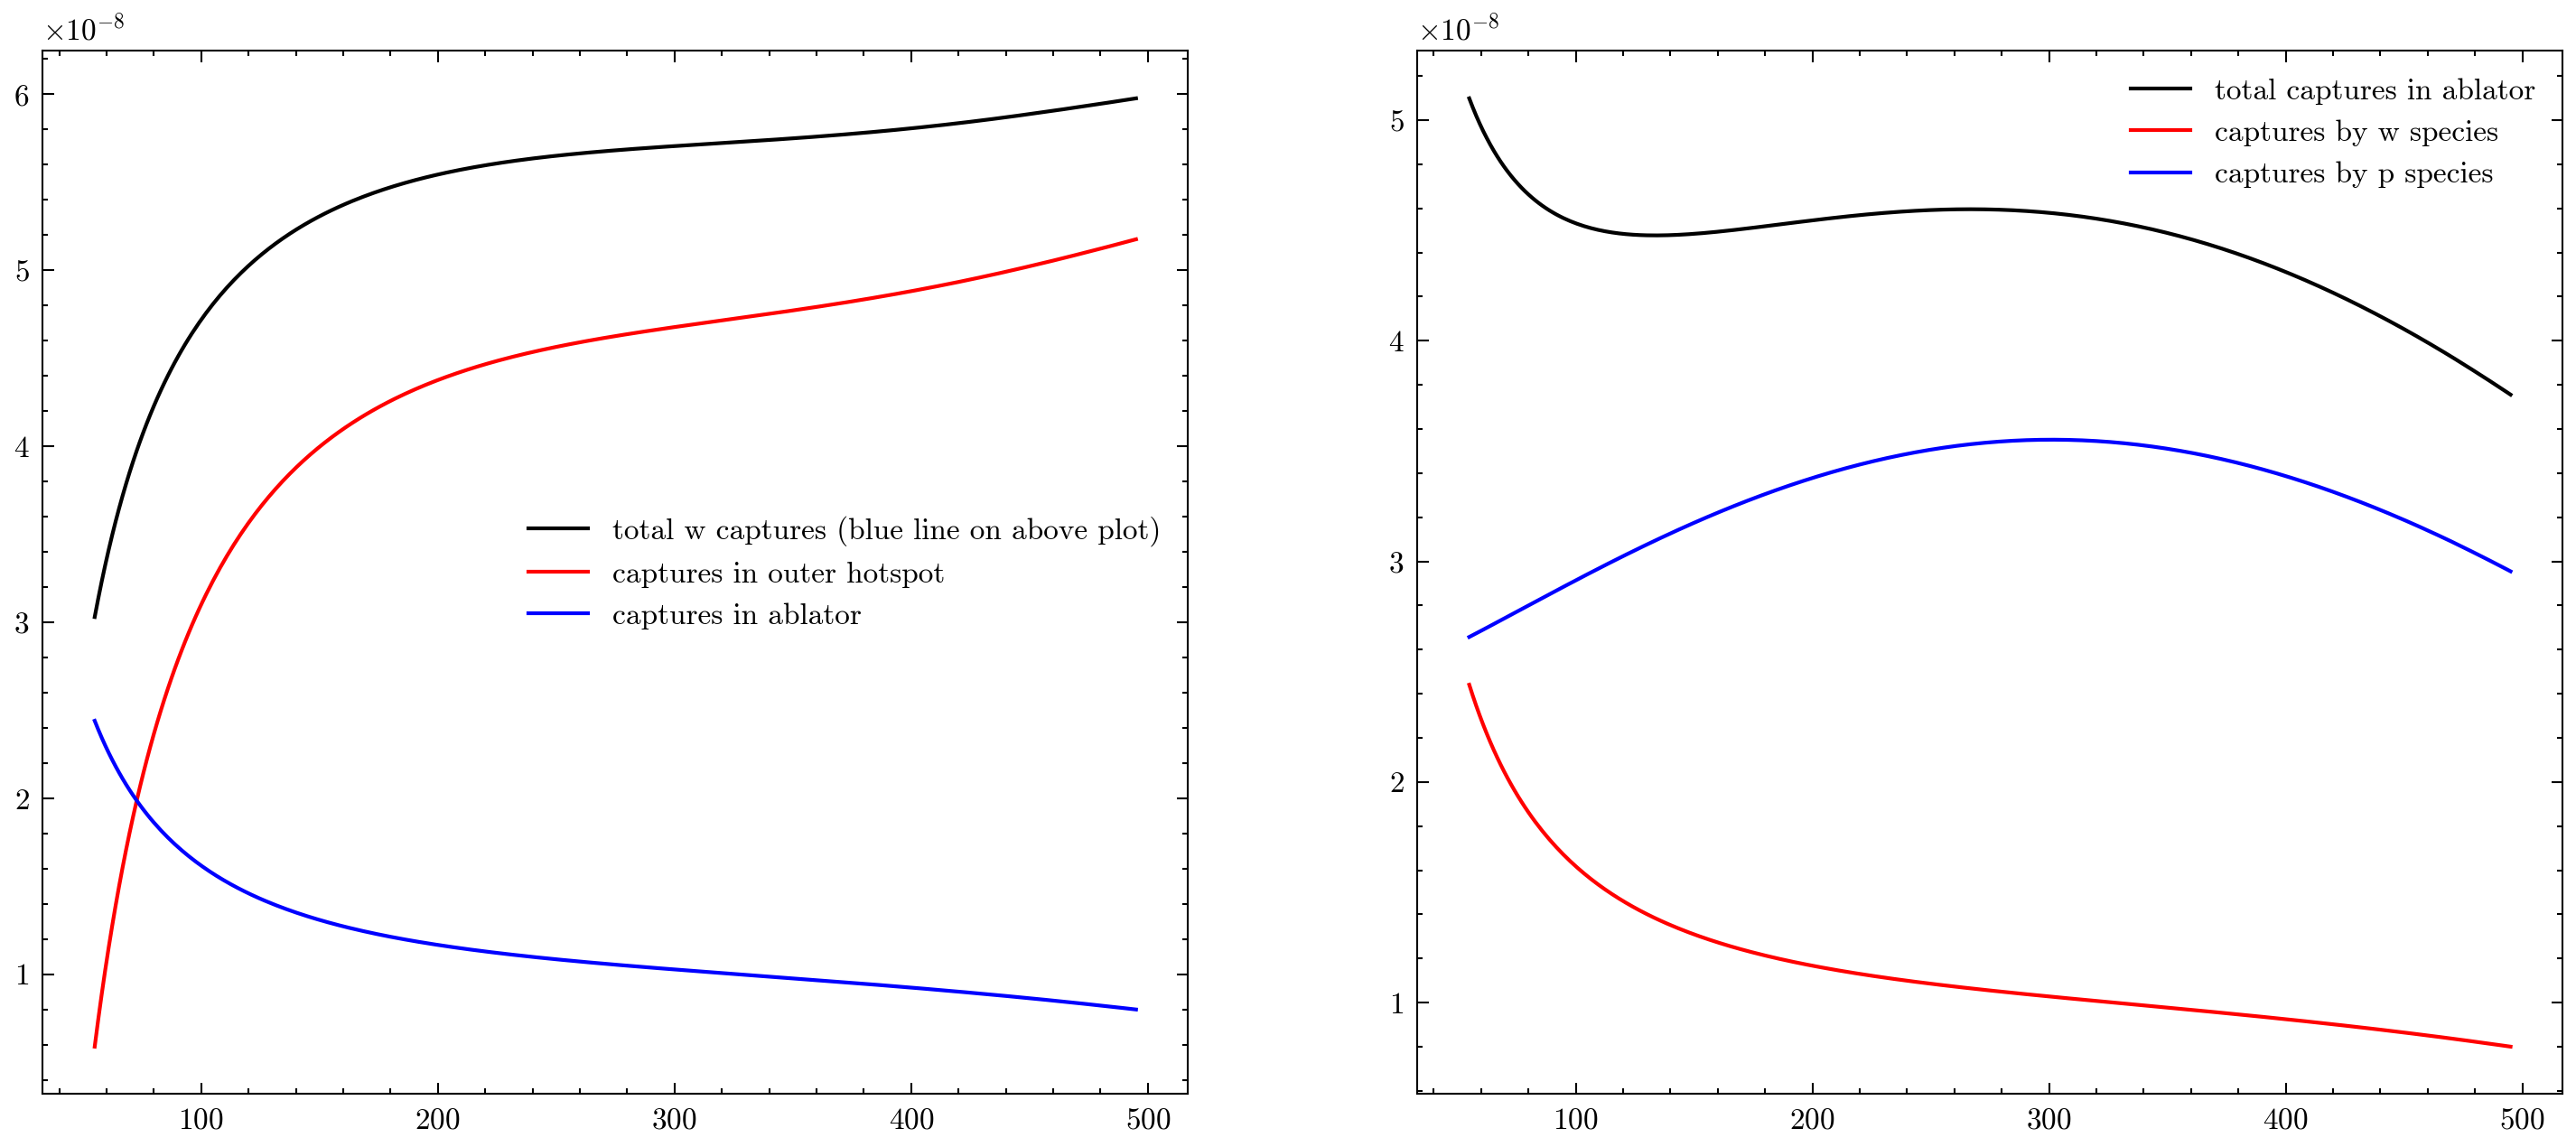

In [52]:
fig,axs = plt.subplots(1,2, figsize=(12,5))

# decomopsing well-mixed captures into captures in outer hotspot and ablator

y_w_outer = experiment.N_captures_w_outer * 100 / experiment.total_neutrons
y_w_ablator = experiment.N_captures_w_ablator * 100 / experiment.total_neutrons


axs[0].plot(x, y_w, '-', label='total w captures (blue line on above plot)')
axs[0].plot(x, y_w_outer, '-', label='captures in outer hotspot')
axs[0].plot(x, y_w_ablator, '-', label='captures in ablator')

axs[0].legend()

# captures that happen in ablator are from poorly-mixed and well-mixed

axs[1].plot(x, y_w_ablator + y_p, label='total captures in ablator')

axs[1].plot(x, y_w_ablator, '-', label='captures by w species')
axs[1].plot(x, y_p, '-', label='captures by p species')

axs[1].legend()


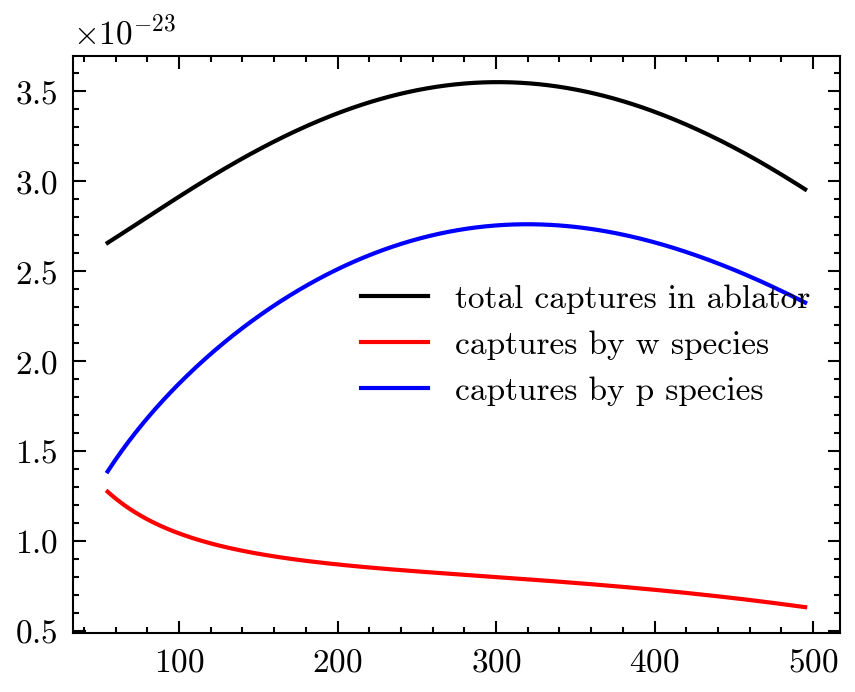

In [53]:
# captures per target ion looks kinda weird

ablator_volume = 4 * np.pi / 3 * ((experiment.TOTAL_CAPSULE_RADIUS)**3 - (experiment.TOTAL_CAPSULE_RADIUS - experiment.ablator_thickness)**3)
w_ions_ablator = experiment.target_fraction_w_ablator * experiment.ABLATOR_DENSITY * ablator_volume

total_ablator_ions = w_ions_ablator + experiment.N_TARGET_IONS


plt.plot(x, (y_w_ablator + y_p)/total_ablator_ions, label='total captures in ablator')

plt.plot(x, y_w_ablator/total_ablator_ions, '-', label='captures by w species')
plt.plot(x, y_p/total_ablator_ions, '-', label='captures by p species')

plt.legend()

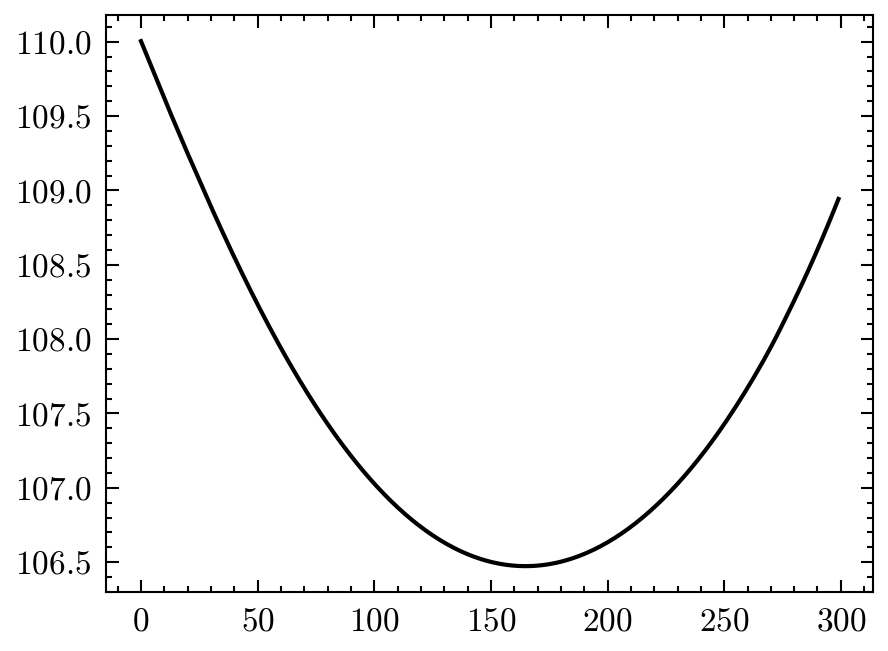

In [54]:
plt.plot(experiment.total_neutrons)

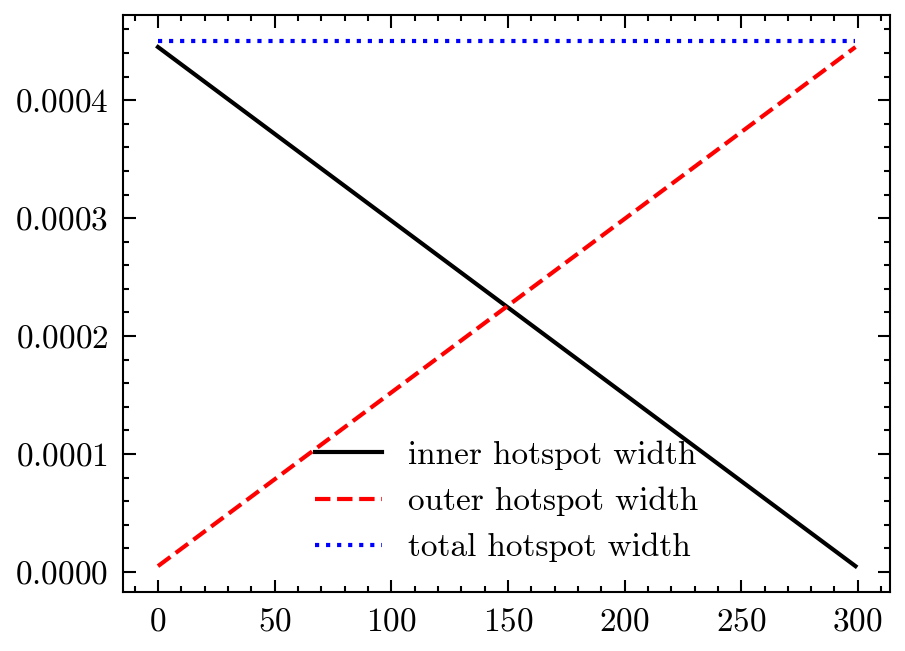

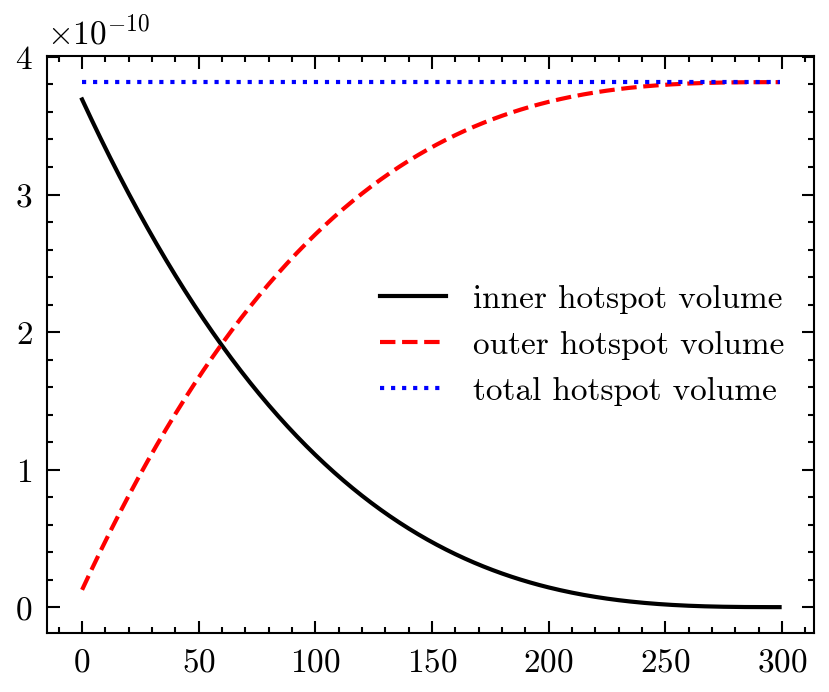

In [55]:
plt.plot(experiment.inner_hotspot, label='inner hotspot width')
plt.plot(experiment.outer_hotspot, label='outer hotspot width')

plt.plot(experiment.inner_hotspot + experiment.outer_hotspot, label='total hotspot width')
plt.legend()
plt.show()



inner_vol = 4 * np.pi / 3 * experiment.inner_hotspot**3
outer_vol = 4 * np.pi / 3 * ((experiment.inner_hotspot + experiment.outer_hotspot)**3 - experiment.inner_hotspot**3)


plt.plot(inner_vol, label='inner hotspot volume')
plt.plot(outer_vol, label='outer hotspot volume')
plt.plot(inner_vol + outer_vol, label='total hotspot volume')
plt.legend()
plt.show()

In [56]:
ablator_volume = 4 * np.pi / 3 * ((experiment.TOTAL_CAPSULE_RADIUS)**3 - (experiment.TOTAL_CAPSULE_RADIUS-experiment.ablator_thickness)**3)
n_w_ablator = ablator_volume * experiment.ABLATOR_DENSITY * experiment.target_fraction_w
outer_volume = 4 * np.pi / 3 * ((experiment.inner_hotspot + experiment.outer_hotspot)**3 - (experiment.inner_hotspot)**3)
n_w_outer = outer_volume * experiment.FUEL_DENSITY * experiment.target_fraction_w


# n_p = ablator_volume

AttributeError: 'Experiment' object has no attribute 'target_fraction_w'

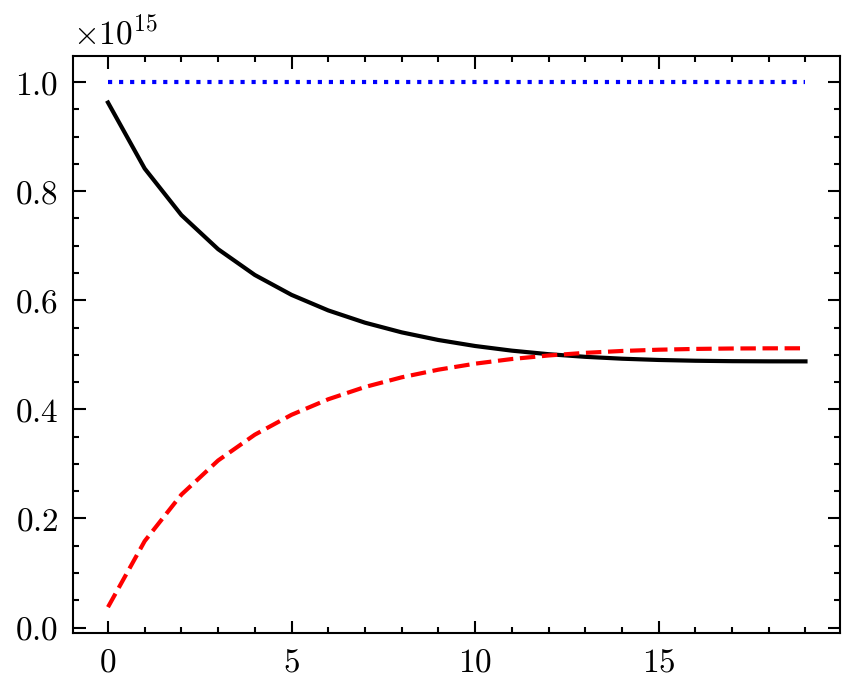

In [ ]:
plt.plot(n_w_ablator)
plt.plot(n_w_outer)
plt.plot(n_w_outer + n_w_ablator)
plt.show()



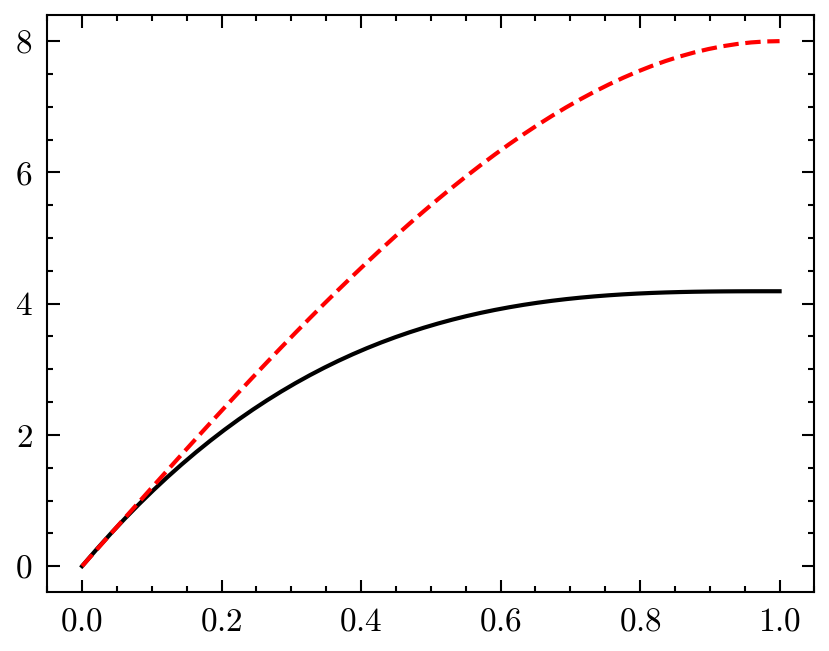

In [ ]:
# volume change by increasing shell thickness inwards...


d = np.linspace(0,1)
V = 4 * np.pi / 3 * (1**3 - (1-d)**3)
plt.plot(d, V)

y = 4 * d**3 - 12*d*2 + 12*d
plt.plot(d, -y)